In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [2]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
results = adfuller(data['Month']) 
results #this is nit a stationary data pvalue > 0.05

(np.float64(0.4187554833795438),
 np.float64(0.982182940442805),
 12,
 131,
 {'1%': np.float64(-3.481281802271349),
  '5%': np.float64(-2.883867891664528),
  '10%': np.float64(-2.5786771965503177)},
 np.float64(8243.16220818428))

In [7]:
data.set_index('Month', inplace=True) 

In [8]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

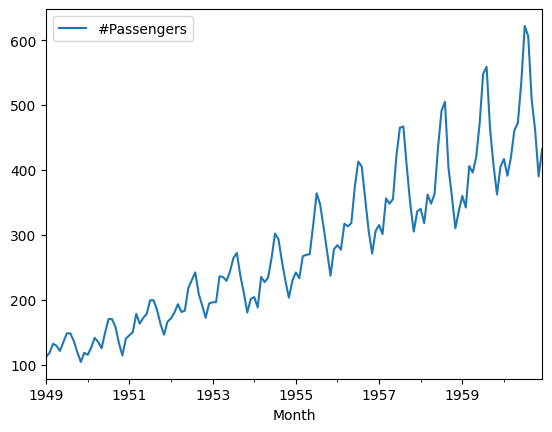

In [9]:
data.plot() # This data is not stationary

Plot the time series data with rolling mean and rolling standard deviation and see if it is stationary.

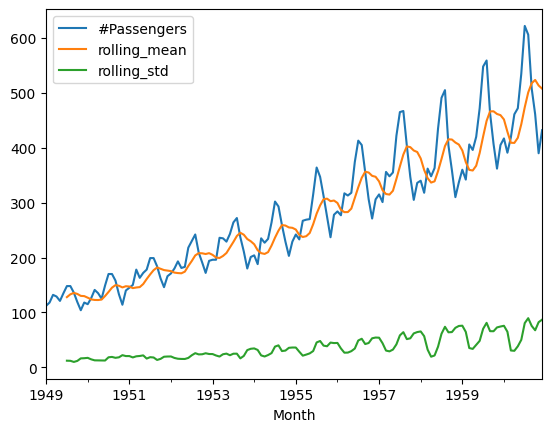

In [10]:
data['rolling_mean'] = data['#Passengers'].rolling(7).mean() 
data['rolling_std'] = data['#Passengers'].rolling(7).std() 

data.plot(); # change in variance, trend of the mean, change in auto-covariance

Observation: This data is not stationary having a trend in mean

Try different levels of differences, and plot the time series data with rolling mean and standard deviation. See if it is stationary.

In [11]:
data['New_#Passengers'] = data['#Passengers'].shift()
data

,#Passengers,rolling_mean,rolling_std,New_#Passengers
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,112.0
1949-03-01,132,NaN,NaN,118.0
1949-04-01,129,NaN,NaN,132.0
1949-05-01,121,NaN,NaN,129.0
...,...,...,...,...
1960-08-01,606,500.857143,89.523607,622.0
1960-09-01,508,517.571429,75.403044,606.0
1960-10-01,461,523.571429,67.510140,508.0


In [12]:
data['diff1'] = data['#Passengers'].diff()
data

,#Passengers,rolling_mean,rolling_std,New_#Passengers,diff1
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,112.0,6.0
1949-03-01,132,NaN,NaN,118.0,14.0
1949-04-01,129,NaN,NaN,132.0,-3.0
1949-05-01,121,NaN,NaN,129.0,-8.0
...,...,...,...,...,...
1960-08-01,606,500.857143,89.523607,622.0,-16.0
1960-09-01,508,517.571429,75.403044,606.0,-98.0
1960-10-01,461,523.571429,67.510140,508.0,-47.0


In [13]:
data['diff2'] = data['#Passengers'].diff(2)
data

,#Passengers,rolling_mean,rolling_std,New_#Passengers,diff1,diff2
Month,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,112.0,6.0,NaN
1949-03-01,132,NaN,NaN,118.0,14.0,20.0
1949-04-01,129,NaN,NaN,132.0,-3.0,11.0
1949-05-01,121,NaN,NaN,129.0,-8.0,-11.0
...,...,...,...,...,...,...
1960-08-01,606,500.857143,89.523607,622.0,-16.0,71.0
1960-09-01,508,517.571429,75.403044,606.0,-98.0,-114.0
1960-10-01,461,523.571429,67.510140,508.0,-47.0,-145.0


In [14]:
data['diff3'] = data['#Passengers'].diff(3)
data

,#Passengers,rolling_mean,rolling_std,New_#Passengers,diff1,diff2,diff3
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,112.0,6.0,NaN,NaN
1949-03-01,132,NaN,NaN,118.0,14.0,20.0,NaN
1949-04-01,129,NaN,NaN,132.0,-3.0,11.0,17.0
1949-05-01,121,NaN,NaN,129.0,-8.0,-11.0,3.0
...,...,...,...,...,...,...,...
1960-08-01,606,500.857143,89.523607,622.0,-16.0,71.0,134.0
1960-09-01,508,517.571429,75.403044,606.0,-98.0,-114.0,-27.0
1960-10-01,461,523.571429,67.510140,508.0,-47.0,-145.0,-161.0


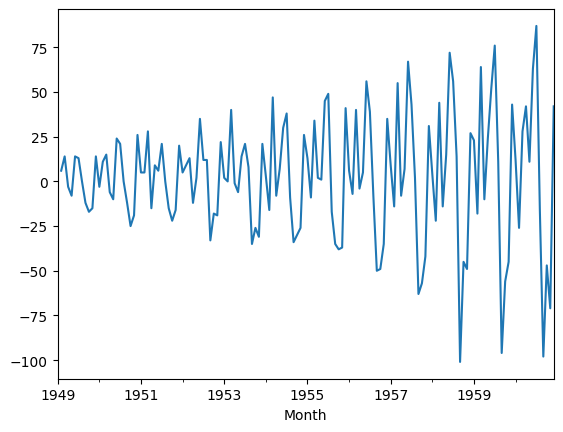

In [15]:
data['diff1'].plot(); # no trend but change in variance so it is not stationary

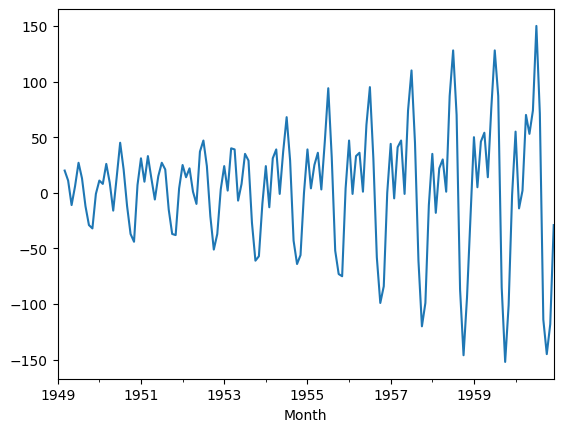

In [16]:
data['diff2'].plot(); # no trend but change in variance so it is not stationary

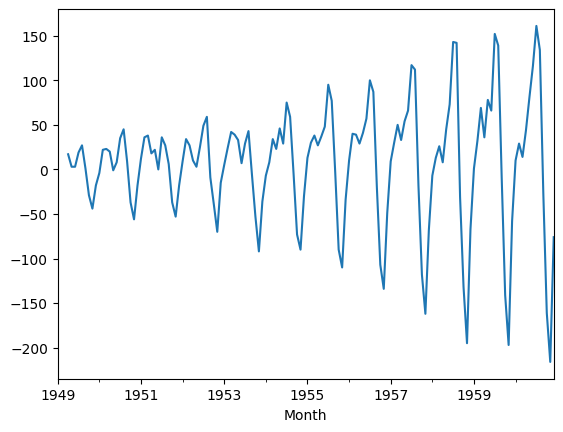

In [17]:
data['diff3'].plot(); # no trend but change in variance so it is not stationary

Try to transform the data, and make different levels of differences. See if it is stationary.

<Axes: xlabel='Month'>

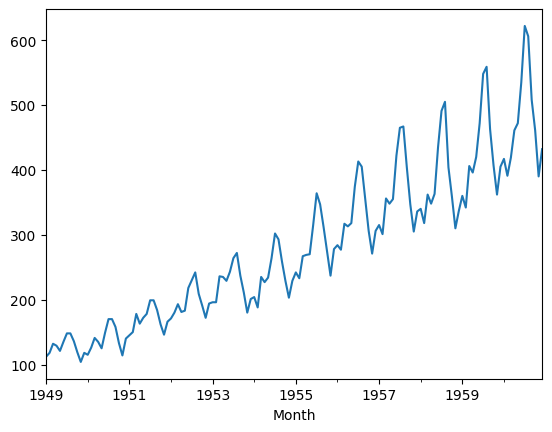

In [18]:
data['#Passengers'].plot()

In [19]:
data['log_#Passengers'] = np.log(data['#Passengers'])

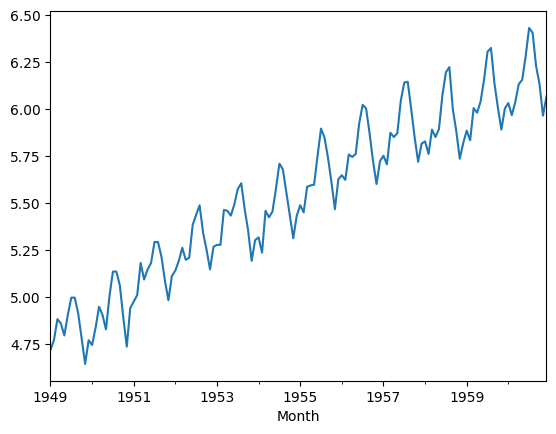

In [20]:
data['log_#Passengers'].plot();

In [21]:
data['NewLog_#Passengers'] = data['log_#Passengers'].shift()
data

,#Passengers,rolling_mean,rolling_std,New_#Passengers,diff1,diff2,diff3,log_#Passengers,NewLog_#Passengers
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,4.718499,NaN
1949-02-01,118,NaN,NaN,112.0,6.0,NaN,NaN,4.770685,4.718499
1949-03-01,132,NaN,NaN,118.0,14.0,20.0,NaN,4.882802,4.770685
1949-04-01,129,NaN,NaN,132.0,-3.0,11.0,17.0,4.859812,4.882802
1949-05-01,121,NaN,NaN,129.0,-8.0,-11.0,3.0,4.795791,4.859812
...,...,...,...,...,...,...,...,...,...
1960-08-01,606,500.857143,89.523607,622.0,-16.0,71.0,134.0,6.406880,6.432940
1960-09-01,508,517.571429,75.403044,606.0,-98.0,-114.0,-27.0,6.230481,6.406880
1960-10-01,461,523.571429,67.510140,508.0,-47.0,-145.0,-161.0,6.133398,6.230481


<Axes: xlabel='Month'>

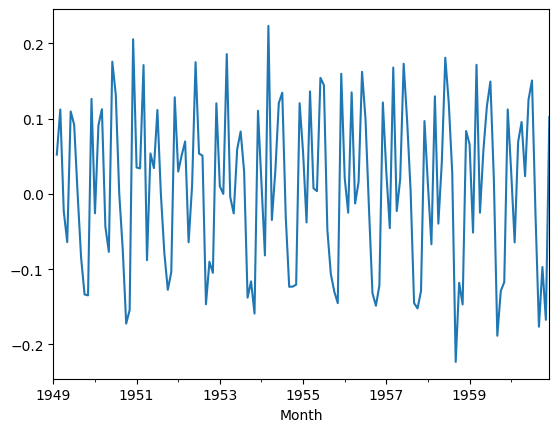

In [22]:
data['diff1_log'] = data['log_#Passengers'].diff()
data['diff1_log'].plot()

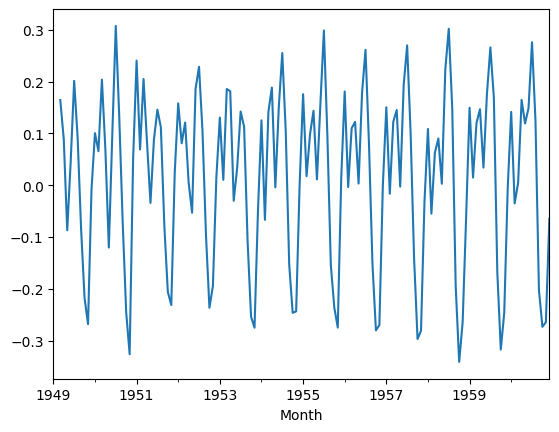

In [23]:
data['diff2_log'] = data['log_#Passengers'].diff(2)
data['diff2_log'].plot();

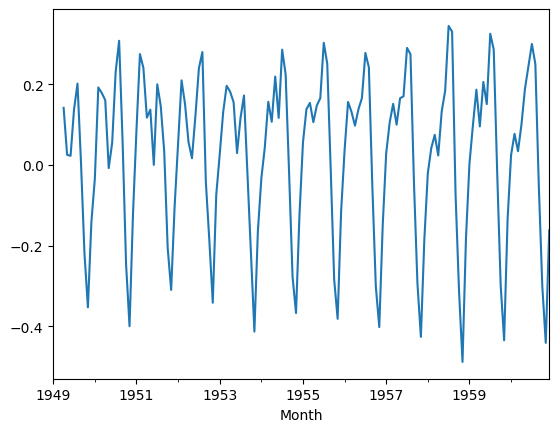

In [24]:
data['diff3_log'] = data['log_#Passengers'].diff(3)
data['diff3_log'].plot();

In [25]:
adf = adfuller(data['log_#Passengers'].dropna())
adf # not stationary 

(np.float64(-1.717017089106963),
 np.float64(0.4223667747703902),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-445.3990312497209))

In [26]:
adf1 = adfuller(data['diff1_log'].dropna())
adf1 #not stationary

(np.float64(-2.717130598388136),
 np.float64(0.0711205481508582),
 14,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-440.35846985568105))

In [27]:
adf2 = adfuller(data['diff2_log'].dropna())
adf2  # stationary

(np.float64(-3.1679073752887272),
 np.float64(0.02191911456403987),
 11,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-431.93712963284486))

In [28]:
adf3 = adfuller(data['diff3_log'].dropna())
adf3 #not stationary

(np.float64(-2.728487353194971),
 np.float64(0.069237102340554),
 12,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-439.15981985280405))